<a href="https://colab.research.google.com/github/isaachfp/bi-master/blob/master/OP/20210309_Exercicio%20Caminhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rotas de entrega - Caminhao


### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 11.6MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [3]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def DespesaCaminhoes(individual):
  # Loja1Armazem1 = math.ceil(individual[0])
  # Loja2Armazem1 = math.ceil(individual[1])
  # Loja3Armazem1 = math.ceil(individual[2])
  # Loja1Armazem2 = math.ceil(individual[3])
  # Loja2Armazem2 = math.ceil(individual[4])
  # Loja3Armazem2 = math.ceil(individual[5])
  # Loja1Armazem3 = math.ceil(individual[6])
  # Loja2Armazem3 = math.ceil(individual[7])
  # Loja3Armazem3 = math.ceil(individual[8])
  matrizViagens = numpy.ceil(numpy.resize(individual, [3,3])/4)
  matrizCustos = [[500, 420, 360], [340, 380, 275], [190, 230, 250]]
  custo_total = numpy.sum(matrizViagens*matrizCustos)
  return custo_total,

In [4]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  if(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all() and numpy.greater_equal(demandaAtingida, demandaMinima).all()):
    return True
  return False

In [5]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def Penalizacao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  armazenamentoExcedente = 0
  demandaFaltante = 0
  if(not(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all())):
    armazenamentoExcedente = (numpy.sum(armazenamentoAtingido - armazenamentoMaximo))**2

  if(not(numpy.greater_equal(demandaAtingida, demandaMinima).all())):
    demandaFaltante = (numpy.sum(demandaMinima - demandaAtingida))**2

  return (armazenamentoExcedente + demandaFaltante)**2

In [6]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, random_function):
  i = 0
  cromossomo = list()
  for _ in range(150): 
  # while(1):
    a1l1 = random_function()
    a2l1 = random_function()
    a3l1 = random_function()
    a1l2 = random_function()
    a2l2 = random_function()
    a3l2 = random_function()
    a1l3 = random_function()
    a2l3 = random_function()
    a3l3 = random_function()
    if(FuncaoDeRestricao([a1l1, a2l1, a3l1, a1l2, a2l2, a3l2, a1l3, a2l3, a3l3])):
      break
    i = i + 1
  cromossomo.append(a1l1)
  cromossomo.append(a2l1)
  cromossomo.append(a3l1)
  cromossomo.append(a1l2)
  cromossomo.append(a2l2)
  cromossomo.append(a3l2)
  cromossomo.append(a1l3)
  cromossomo.append(a2l3)
  cromossomo.append(a3l3)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [8]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("random_int", random.randint, 0, 300)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.random_int)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", DespesaCaminhoes)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, Penalizacao)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxUniform, indpb=0.6)
# toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.25)
# toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selRoulette)

## Chamada efetiva do GA para resolução

In [9]:
pop = toolbox.population(n=14)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [10]:
# Definindo sementes iniciais
ind1 = creator.Individual([80, 120, 110, 75, 90, 170, 42, 37, 12])
pop.append(ind1)

In [11]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.3, ngen=80, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg        	std        	min        	max        
0  	15    	3.91204e+11	4.67828e+11	2.65689e+09	1.89318e+12
1  	13    	7.58429e+11	8.55635e+11	2.05835e+09	3.46145e+12
2  	7     	1.90859e+12	1.49421e+12	3.2141e+09 	3.46145e+12
3  	15    	2.95463e+12	1.08895e+12	3.3271e+09 	3.70089e+12
4  	8     	2.61617e+12	1.27822e+12	5.05022e+11	3.70089e+12
5  	12    	2.63902e+12	1.26495e+12	1.42126e+11	3.70089e+12
6  	11    	2.40467e+12	1.18043e+12	8.75781e+10	3.46145e+12
7  	9     	2.28586e+12	1.11056e+12	5.70268e+11	3.70089e+12
8  	11    	2.35243e+12	1.38527e+12	4.49986e+09	3.80878e+12
9  	14    	2.82628e+12	8.80743e+11	1.19709e+12	3.80878e+12
10 	12    	2.28417e+12	1.45285e+12	1.43319e+10	3.70089e+12
11 	11    	2.40078e+12	1.53908e+12	8.52698e+08	3.70089e+12
12 	12    	3.08649e+12	1.13512e+12	2.401e+11  	3.70089e+12
13 	11    	2.39621e+12	1.30736e+12	7.03443e+10	3.80878e+12
14 	13    	1.73628e+12	1.37662e+12	2.15177e+10	3.70089e+12
15 	9     	1.97258e+12	1.23802e+12	1.01905e+11	3.70089e+

## Resultados

In [12]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
DespesaCaminhoes(hof[0])

Melhor Indivíduo:
[0, 0, 0, 0, 287, 1, 271, 0, 80]
False
Melhor Resultado da Função Objetivo:


(45555.0,)

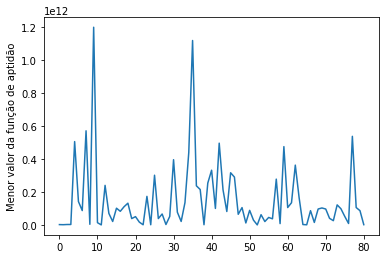

In [13]:
import matplotlib.pyplot as plt
gen, minVal = log.select("gen", "min")
plt.plot(gen, minVal)
plt.ylabel('Menor valor da função de aptidão')
plt.show()

## Utilizando a forma alternativa de resolução do mesmo problema

In [14]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[99, 118, 199, 204, 40, 9, 151, 23, 52], [92, 96, 109, 40, 136, 47, 11, 105, 7], [14, 224, 105, 204, 61, 24, 131, 109, 108], [42, 283, 33, 121, 15, 262, 210, 51, 12], [94, 112, 219, 205, 11, 162, 191, 14, 40], [103, 286, 119, 140, 106, 139, 97, 78, 48], [98, 0, 260, 39, 200, 214, 258, 0, 68], [39, 132, 47, 268, 184, 48, 164, 44, 255], [33, 174, 268, 18, 130, 211, 277, 6, 100], [4, 8, 162, 200, 100, 152, 177, 183, 246], [242, 227, 160, 289, 26, 54, 45, 83, 108], [60, 55, 118, 165, 286, 22, 244, 110, 235], [270, 225, 15, 146, 272, 19, 139, 28, 188], [30, 135, 223, 153, 173, 95, 181, 288, 62], [291, 210, 4, 99, 64, 252, 55, 250, 142], [172, 101, 183, 51, 136, 192, 42, 213, 281], [67, 154, 201, 117, 147, 89, 278, 230, 132], [218, 130, 162, 108, 117, 279, 42, 258, 144], [143, 135, 82, 227, 121, 40, 137, 199, 43], [227, 283, 134, 195, 11, 180, 143, 101, 209], [27, 238, 57, 69, 231, 233, 238, 129, 265], [155, 233, 202, 69, 142, 265, 60, 206, 180], [202, 150, 296, 232, 54, 153, 55

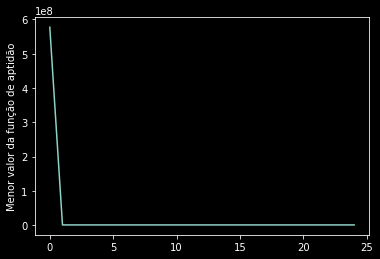

In [15]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Menor valor da função de aptidão')
plt.show()